# Analyze and plot data

## Setup

In [1]:
import glob
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
evals_raw_fname = "expectation_values_raw.pkl"
evals_encoded_fname = "expectation_values_encoded.txt"
evals_dd_fname = "expectation_values_encoded_dd.txt"

## Select data

In [8]:
# Load experiment data matching these parameters.
depths = np.arange(0, 100 + 1, 20)
pattern = "./distance3/fez/*"

In [18]:
dir = glob.glob(pattern)[0]

In [23]:
all_evals = []
all_evals_dd = []

for dir in glob.glob(pattern):
    if dir.endswith("_dd"):
        all_evals_dd.append(np.loadtxt(f"{dir}/evals.txt"))
    else:
        all_evals.append(np.loadtxt(f"{dir}/evals.txt"))

all_evals = np.array(all_evals)
all_evals_dd = np.array(all_evals_dd)

In [26]:
np.average(all_evals, axis=0)

array([0.96804411, 0.96133979, 0.94825189, 0.90766019, 0.76934792,
       0.5057364 ])

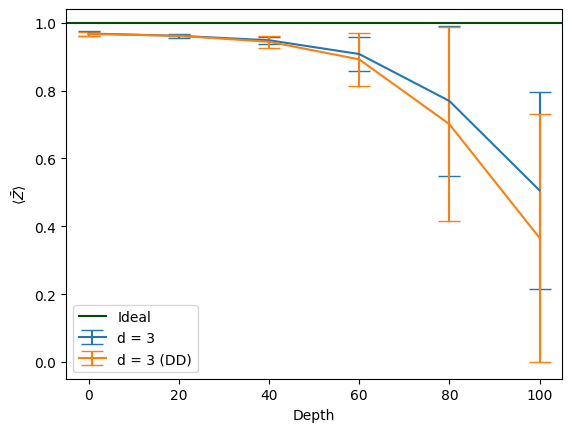

In [40]:
plt.errorbar(
    depths, 
    np.average(all_evals, axis=0), 
    yerr=np.std(all_evals, axis=0, ddof=1),
    capsize=8,
    label="d = 3",
)
plt.errorbar(
    depths, 
    np.average(all_evals_dd, axis=0), 
    yerr=np.std(all_evals_dd, axis=0, ddof=1),
    capsize=8,
    label="d = 3 (DD)",
)

plt.axhline(1.0, label="Ideal", color="xkcd:darkgreen")

plt.xlabel("Depth")
plt.ylabel(r"$\langle \bar{Z} \rangle$")
plt.legend();

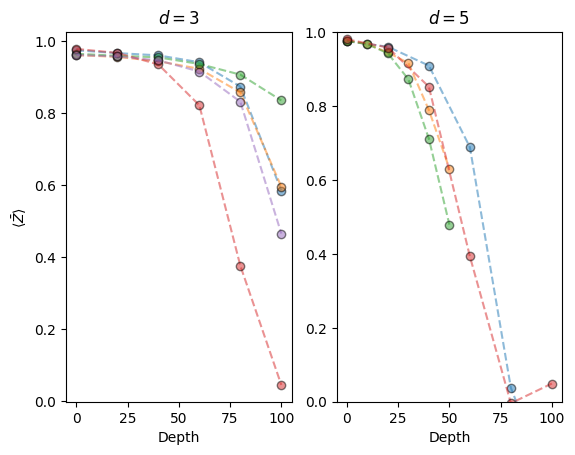

In [68]:
opts = {"alpha": 0.50, "mec": "black"}

plt.subplot(121)
plt.title("$d = 3$")
for dir in glob.glob("./distance3/fez/*"):
    if dir.endswith("_dd"):
        pass
    else:
        depths = np.loadtxt(f"{dir}/depths.txt")
        evals = np.loadtxt(f"{dir}/evals.txt")
        plt.plot(depths, evals, "--o", **opts)

plt.xlabel("Depth")
plt.ylabel(r"$\langle \bar{Z} \rangle$")

plt.subplot(122)

plt.title("$d = 5$")
for dir in glob.glob("./distance5/*"):
    if not dir.endswith("_dd"):
        depths = np.loadtxt(f"{dir}/depths.txt")
        evals = np.loadtxt(f"{dir}/evals.txt")

        plt.plot(depths, evals, "--o", **opts)
plt.ylim(0, 1)
plt.xlabel("Depth");

## Load data

In [14]:
all_counts = []
for depth in depths:
    counts = pickle.load(open(f"{dir}/depth_{depth}_counts.pkl", "rb"))
    all_counts.append(counts)

In [17]:
logical0 = np.loadtxt("logical0_d3.txt")
logical1 = np.loadtxt("logical1_d3.txt")

## Plot

In [ ]:
plt.rcParams.update({"font.family": "serif", "font.size": 12})
colors = ["xkcd:blue", "xkcd:orange", "xkcd:red"]
alpha: float = 0.75

plt.axhline(1.0, label="Ideal", alpha=alpha, color="xkcd:darkgreen")
plt.plot(depths, evals_raw_avg, "--o", alpha=alpha, label="Physical (Average)")
plt.fill_between(depths, y1=evals_raw_avg - evals_raw_std, y2=evals_raw_avg + evals_raw_std, alpha=0.15)
# plt.plot(depths, all_evals[121], "--o", alpha=alpha, label="Physical (Best)")
plt.plot(depths, evals_encoded_avg, "--o", alpha=alpha, label="Encoded")
plt.fill_between(depths, y1=evals_encoded_avg - evals_encoded_std, y2=evals_encoded_avg + evals_encoded_std, alpha=0.15)
plt.plot(depths, evals_dd_avg, "--o", alpha=alpha, label="Encoded + DD")
plt.fill_between(depths, y1=evals_dd_avg - evals_dd_std, y2=evals_dd_avg + evals_dd_std, alpha=0.15)

plt.ylabel(r"$\langle \bar{Z} \rangle$")
plt.xlabel("Depth")

plt.tight_layout()
plt.legend();
# plt.savefig("color_code_distance_three_memory_z_averages.pdf")